In [1]:
!pip install nengo --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.3/535.3 kB 2.2 MB/s eta 0:00:00


In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import nengo
from nengo.dists import Choice
from nengo.utils.ensemble import response_curves, tuning_curves

ERROR:nengo.cache:Decoder cache index corrupted. Reinitializing cache.
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/nengo/cache.py", line 462, in __enter__
    self._load_index_file()
  File "/usr/local/lib/python3.10/dist-packages/nengo/cache.py", line 385, in _load_index_file
    with self.index_path.open("rb") as f:
  File "/usr/lib/python3.10/pathlib.py", line 1119, in open
    return self._accessor.open(self, mode, buffering, encoding, errors,
FileNotFoundError: [Errno 2] No such file or directory: '/root/.cache/nengo/decoders/index'


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

Text(0.5, 0, 'Input scalar, x')

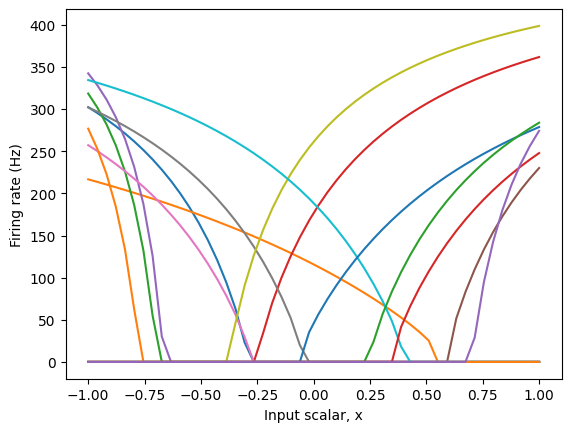

In [3]:
model = nengo.Network()
with model:
    ens_1d = nengo.Ensemble(15, dimensions=1)
with nengo.Simulator(model) as sim:
    eval_points, activities = tuning_curves(ens_1d, sim)

plt.figure()
plt.plot(eval_points, activities)
# We could have alternatively shortened this to
# plt.plot(*tuning_curves(ens_1d, sim))
plt.ylabel("Firing rate (Hz)")
plt.xlabel("Input scalar, x")

Each coloured line represents the response on one neuron. As you can see, the neurons cover the space pretty well, but there is no clear pattern to their responses.

If there is some biological or functional reason to impose some pattern to their responses, we can do so by changing the parameters of the ensemble.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

Text(0.5, 0, 'Input scalar, x')

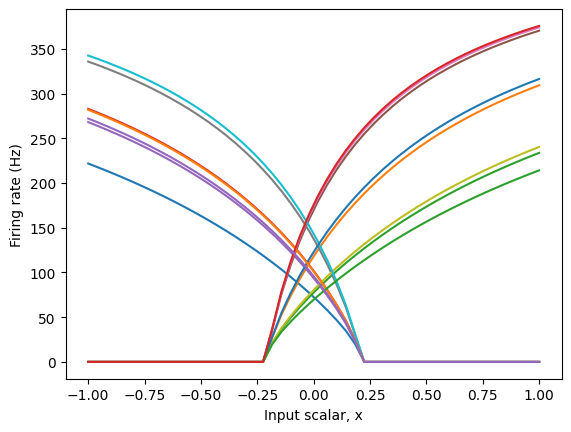

In [4]:
ens_1d.intercepts = Choice([-0.2])  # All neurons have x-intercept -0.2
with nengo.Simulator(model) as sim:
    plt.figure()
    plt.plot(*tuning_curves(ens_1d, sim))

plt.ylabel("Firing rate (Hz)")
plt.xlabel("Input scalar, x")

Now, there is a clear pattern to the tuning curve. However, note that some neurons start firing at -0.2, while others stop firing at 0.2. This is because the input signal, x, is multiplied by a neuron’s encoder when it is converted to input current.

We could further constrain the tuning curves by changing the encoders of the ensemble.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

Text(0.5, 0, 'Input scalar, x')

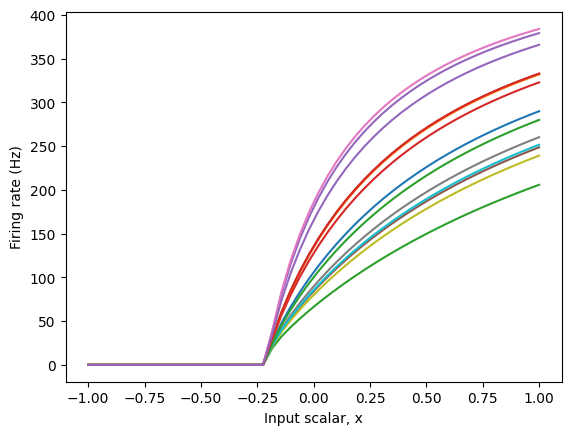

In [5]:
ens_1d.encoders = Choice([[1]])  # All neurons have encoder [1]
with nengo.Simulator(model) as sim:
    plt.figure()
    plt.plot(*tuning_curves(ens_1d, sim))

plt.ylabel("Firing rate (Hz)")
plt.xlabel("Input scalar, x")

This gives us an ensemble of neurons that respond very predictably to input. In some cases, this is important to the proper functioning of a model, or to matching what we know about the physiology of a brain area or neuron type.

# N-dimensional ensembles

The `tuning_curve` function accepts ensembles of any dimensionality, and will always return eval_points and activities. However, for ensembles of dimensionality greater than 2, these are large arrays and it becomes nearly impossible to visualize them.

There are two main approaches to investigating the tuning curves of ensembles of arbitrary dimensionality.

# Clamp some axes

In many cases, we only care about the neural sensitivity to one or two dimensions. We can investigate those dimensions specifically by only varying those dimensions, and keeping the rest constant.

To do this, we will use the inputs argument to the `tuning_curves` function, which allows us to define the input signals that will drive the neurons to determine their activity. In other words, we are specifying the eval_point parameter to generate the `activities`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

Text(0.5, 0, '$x_0$')

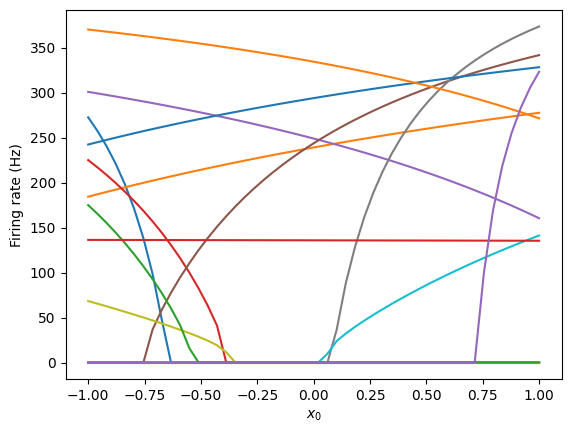

In [6]:
model = nengo.Network()
with model:
    ens_3d = nengo.Ensemble(15, dimensions=3)

inputs = np.zeros((50, 3))
# Vary the first dimension
inputs[:, 0] = np.linspace(-float(ens_3d.radius), float(ens_3d.radius), 50)
inputs[:, 1] = 0.5  # Clamp the second dimension
inputs[:, 2] = 0.5  # Clamp the third dimension

with nengo.Simulator(model) as sim:
    eval_points, activities = tuning_curves(ens_3d, sim, inputs=inputs)

assert eval_points is inputs  # The inputs will be returned as eval_points

plt.figure()
plt.plot(inputs.T[0], activities)
plt.ylabel("Firing rate (Hz)")
plt.xlabel("$x_0$")

# **Response curves**
If all else fails, we can still get some information about the tuning properties of the neurons in the ensemble using the response curve. The response curve is similar to the tuning curve, but instead of looking at the neural response to a particular input stimulus, we are instead looking at its response to (relative) injected current. This is analogous to the tuning curves with the inputs aligned to the preferred directions of each neuron.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

Text(0.5, 0, 'x along preferred direction')

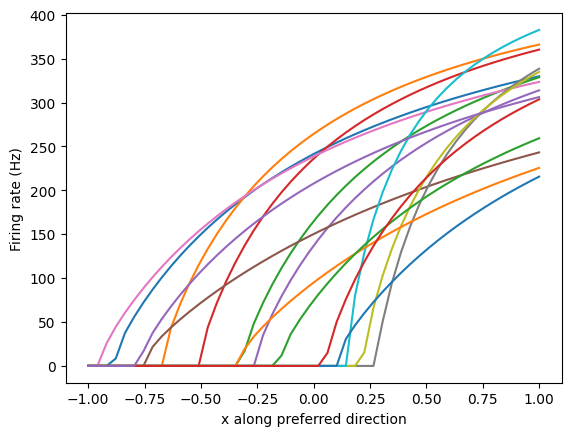

In [7]:
model = nengo.Network()
with model:
    ens_5d = nengo.Ensemble(15, dimensions=5)
with nengo.Simulator(model) as sim:
    plt.figure()
    plt.plot(*response_curves(ens_5d, sim))

plt.ylabel("Firing rate (Hz)")
plt.xlabel("x along preferred direction")